#Here's what I'm doing

\alpha

In [2]:
%matplotlib inline
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')

I had to apply to Twitter for a consumerKey to make a "Twitter application." This required giving them my cell phone and verifying a code.

In [5]:
consumerKey = 'xxxx'
consumerSecret = 'xxxxx'

#Use tweepy.OAuthHandler to create an authentication using the given key and secret
auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth)

In [6]:
#Perform a basic search query where we search for the '#Oscars2015' in the tweets
result = api.search(q='data science') 

# Print the number of items returned by the search query to verify our query ran. It's 15 by default
len(result)

15

In [7]:
tweet = result[0] #Get the first tweet in the result

# Analyze the data in one tweet to see what we require
for param in dir(tweet):
#The key names beginning with an '_' are hidden ones and usually not required, so we'll skip them
    if not param.startswith("_"):
        print "%s : %s\n" % (param, eval('tweet.'+param))

author : User(follow_request_sent=None, has_extended_profile=False, profile_use_background_image=True, _json={u'follow_request_sent': None, u'has_extended_profile': False, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 39595825, u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/378800000056284188/96e6c581ccd6b42c1532046a4944f56e.jpeg', u'verified': False, u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/378800000734691776/31e10997ddbd4d57932dc3b79beceb56_normal.jpeg', u'profile_sidebar_fill_color': u'EFEFEF', u'entities': {u'description': {u'urls': []}}, u'followers_count': 12019, u'profile_sidebar_border_color': u'FFFFFF', u'id_str': u'39595825', u'profile_background_color': u'131516', u'listed_count': 93, u'is_translation_enabled': False, u'utc_offset': 10800, u'statuses_count': 12834, u'description': u'\u0645\u0633\u062a\u0634\u0627\u0631 \u0645\u062a\u0641\u063

In [8]:
results = []

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='Stockholm').items(5000):
    results.append(tweet)

# Verify the number of items returned
print len(results)

5000


In [9]:
results[6].text

u'Weekend in Stockholm - https://t.co/CRheqCxYgh #Stockholm @Fotografiska @kafeesaias #photography https://t.co/07bKNuVlob'

In [10]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text.encode('ascii','replace') for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    #DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name.encode('ascii','replace') for tweet in tweets]
    DataSet['userName'] = [tweet.user.name.encode('ascii','replace') for tweet in tweets]
    DataSet['userCreateDt'] = [tweet.user.created_at for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description.encode('ascii','replace') for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location.encode('ascii','replace') for tweet in tweets]
    DataSet['userTimezone'] = [tweet.user.time_zone for tweet in tweets]

    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)


In [11]:
test = [tweet.source for tweet in results]
test[-4:]

[u'IFTTT',
 u'Twitter for iPhone',
 u'bortskankes_annonser',
 u'Twitter for Android']

In [12]:
# Let's check the top 5 records in the Data Set
DataSet[:5]

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,662213061827276801,#tagaborgsskolan #t?gaborgsskolan vi ?r p konf...,0,0,2015-11-05 10:21:11,2844831057,chrishansens141,Chris Hansen,2014-10-26 08:16:27,,11,34,,None
1,662213045435912193,Jason Glaser of @LaIslaFdn is nominated for th...,0,0,2015-11-05 10:21:08,1673214966,Sven_Sielhorst,Sven Sielhorst,2013-08-15 13:57:22,everything sugarcane|ethics & integrity|CSR|so...,247,417,Netherlands,None
2,662212976670326784,#stockholm #sweden #ig_sweden #lovesweden #sth...,0,0,2015-11-05 10:20:51,94850410,dharmabhoy,Robert Kelly,2009-12-05 19:15:16,I am a teacher of English and an ordained Bud...,1199,1051,Glasgow,Edinburgh
3,662212928695873536,An artist's studio and home in Stockholm https...,0,1,2015-11-05 10:20:40,3333702916,decosecrets,Deco Secrets,2015-06-18 23:44:31,,13912,13560,,None
4,662212919845920768,Look forward to SUP46 &amp; Stockholm Happy Ho...,0,0,2015-11-05 10:20:38,53401727,ParulSha,Parul Sharma,2009-07-03 14:41:19,Chief Revenue Officer @Hansoft Opinions are my...,57,47,,Arizona


In [13]:
# Similarly let's check the last 2 records in the Data Set
DataSet.tail(2)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
4998,661944832831660036,N?got varmt bortsk?nkes (#stockholm) https://t...,0,0,2015-11-04 16:35:21,2167379246,bortskankes,Bortsk?nkes.se,2013-10-31 22:56:17,Bortsk?nkes.se har sedan 2004 hj?lp till att s...,70,0,Sweden,Stockholm
4999,661944816843010048,RT @halfmoonlouis: pause i just wanna talk abo...,4,0,2015-11-04 16:35:17,2798408014,heartIyharry,ilo misses harry,2014-10-01 17:08:09,''i want you to do whatever makes you the happ...,2845,2721,"june,13th thank you louis",None


In [14]:
# 'None' is treated as null here, so I'll remove all the records having 'None' in their 'userTimezone' column
DataSet = DataSet[DataSet.userTimezone.notnull()]

# Let's also check how many records are we left with now
len(DataSet)

3367

In [15]:

# Count the number of tweets in each time zone and get the first 10
tzs = DataSet['userTimezone'].value_counts()[:10]
print tzs

Stockholm                     609
Pacific Time (US & Canada)    463
London                        256
Eastern Time (US & Canada)    229
Central Time (US & Canada)    183
Casablanca                    176
Athens                        174
Amsterdam                     127
Greenland                      66
Paris                          53
dtype: int64


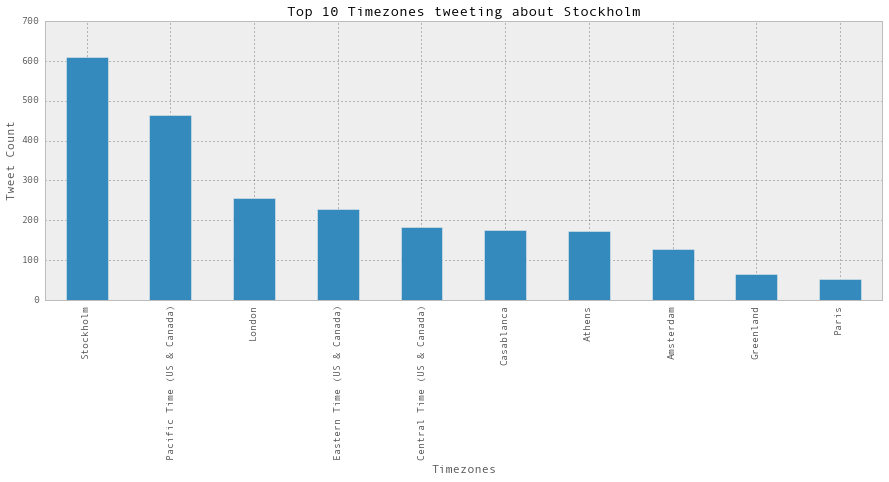

In [16]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
tzs.plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Timezones')
plt.ylabel('Tweet Count')
plt.title('Top 10 Timezones tweeting about Stockholm')